In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as nm

In [4]:
N = 100
T = 1
t = np.linspace(0, T, N + 1)
Delta = np.sqrt(T / N)
x0 = 10


In [5]:
def get_W(T, N, t, Delta):
    W = [0]
    X = np.linspace(0, T, N + 1)
    for i in range (1, len(X)):
        W1 = W[i - 1] + np.random.normal(0, 1) * Delta
        W.append(W1)
    return W

In [6]:
def Black_Scholes_Merton_EM(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 0.2
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        dx = theta1 * x[i-1] * T / N + theta2 * x[i-1] * w[i-1]
        x[i] = x[i-1] + dx
    return x

def Black_Scholes_Merton_sch(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 0.2
    x = np.zeros(N+1)
    x[0] = x0
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
        dx = theta1 * x[i-1] * T / N + theta2 * x[i-1] * w[i-1] + (theta2 ** 2) * x[i-1] * (w[i-1] ** 2 - T / N) / 2
        x[i] = x[i-1] + dx
    return x


def Black_Scholes_Merton_sch2(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 0.2
    x = np.zeros(N+1)
    x[0] = x0
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
        x[i] = (x[i-1]
        + (theta1 * x[i-1] - 1/2 * theta2 ** 2 * x[i-1]) * T / N
        + theta2 * x[i-1] * w[i-1] 
        + 1/2 * theta2 ** 2 * x[i-1] * T / N * (w[i-1] / np.sqrt(T/N)) ** 2
        + (T / N) ** (3/2) * (1/2 * theta1 * x[i-1] * theta2 + 1/2 * theta1 * theta2 * x[i-1]) * (w[i-1] / np.sqrt(T/N)) 
        + (T / N) ** 2 * (1/2 * theta1 ** 2 * x[i-1])
                )
    return x
             
def Black_Scholes_Merton_pc(T, N, t, Delta, x0, Z):
    theta1 = 1
    theta2 = 0.2
    a = 0.5
    n = 0.5
    x = np.zeros(N+1)
    x[0] = x0
    y = np.zeros(N+1)
    y[0] = x0
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
#        Z = np.random.normal(0, 1) * np.sqrt(T/N)
        y[i] = x[i - 1] + theta1 * x[i - 1] * T / N + theta2 * x[i-1] * Z[i-1]
        x[i] = (x[i-1] 
                + (a * (theta1 * y[i] - n * theta2 ** 2 * y[i]) 
                + (1 - a) * (theta1 * x[i-1] - n * theta2 ** 2 * x[i-1])) * T / N 
                + (n * theta2 * y[i]
                + (1 - n) * theta2 * x[i-1]) * Z[i-1]
               )
    return x

def Black_Scholes_Merton_KPS(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 0.2
    x = np.zeros(N+1)
    x[0] = x0
    for i in range(1, N + 1):
        U = np.random.normal(0, 1/3 * (T/N) ** 3)
#         w = np.random.normal(0, np.sqrt(T / N))
        x[i] = (x[i-1] + theta1 * x[i-1] * T / N + theta2 *  x[i-1] * w[i-1] + theta2 ** 2 *  x[i-1] * (w[i-1] ** 2 - T / N) / 2
                + theta2 * x[i-1] * theta1 * U + (theta1 ** 2 * x[i-1]) / 2 * (T / N) ** 2
                + (theta1 * x[i-1] * theta2) * (w[i-1] * T / N - U) + theta2 * x[i-1] * (theta2 * theta2) / 2 * (1/3 * w[i-1] ** 2 - T/ N) * w[i-1])
    return x

In [7]:
def Ornstein_Uhlenbeck_EM(T, N, t, Delta, x0, w):
    theta = 5
    sigma = 3.5
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
        dx = - theta * x[i-1] * T / N + sigma * w[i-1]
        x[i] = x[i-1] + dx
    return x

def Ornstein_Uhlenbeck_sch(T, N, t, Delta, x0, w):
    theta = 5
    sigma = 3.5
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
        dx = - theta * x[i-1] * T / N + sigma * w[i-1]
        x[i] = x[i-1] + dx
    return x

def Ornstein_Uhlenbeck_sch2(T, N, t, Delta, x0, w):
    theta = 5
    sigma = 3.5
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        x[i] = (x[i-1]
        + (- theta * x[i-1]) * T / N
        + sigma * w[i-1]
        + (T / N) ** (3/2) * ((- theta) * sigma / 2) * (w[i-1] / np.sqrt(T/N))
        + (T / N) ** 2 * ((-theta) ** 2 * x[i-1] / 2)
        )
    return x

def Ornstein_Uhlenbeck_pc(T, N, t, Delta, x0, w):
    theta = 5
    sigma = 3.5
    a = 0.5
    n = 0.5
    x = np.zeros(N+1)
    x[0] = x0
    y = np.zeros(N+1)
    y[0] = x0
    for i in range(1, N + 1):
#         w = np.random.normal(0, np.sqrt(T / N))
        y[i] = x[i - 1] - theta * x[i - 1] * T / N + sigma * w[i-1]
        x[i] = (x[i-1] 
                + (a * - theta * y[i] 
                + (1 - a) * (- theta * x[i-1])) * T / N 
                + (n * sigma
                + (1 - n) * sigma) *  w[i-1]
               )
    return x

def Ornstein_Uhlenbeck_KPS(T, N, t, Delta, x0, w):
    theta = 5
    sigma = 3.5
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        U = np.random.normal(0, 1/3 * (T/N) ** 3)
        x[i] = (x[i-1] - theta * T / N * x[i-1]  + sigma * w[i-1]
                - sigma * theta * U)
    return x


In [8]:
def Cox_Ingersoll_Ross_EM(T, N, t, Delta, x0, w):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N+1):
        dx = (theta1 - theta2 * x[i-1]) * T / N + theta3 * np.sqrt(x[i-1]) * w[i-1]
        x[i] = x[i-1] + dx
#         print(x[i])
    return x

def Cox_Ingersoll_Ross_sch(T, N, t, Delta, x0, w):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N+1):
        dx = (theta1 - theta2 * x[i-1]) * T / N + theta3 * np.sqrt(x[i-1]) * w[i-1] - (theta3 ** 2) / 4 * (w[i-1] ** 2 - T / N)
        x[i] = x[i-1] + dx
    return x

def Cox_Ingersoll_Ross_sch2(T, N, t, Delta, x0, w):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        x[i] = (x[i-1]
        + (theta1 - theta2 * x[i-1] + 1/2 * theta3 ** 2) * T / N
        + theta3 * np.sqrt(x[i-1]) * w[i-1]
        - 1/4 * theta3 ** 2 * T / N * (w[i-1] / np.sqrt(T/N)) ** 2
        + (T / N) ** (3/2) * ((theta1 - theta2 * x[i-1]) * - 1/4 * theta3 * np.sqrt(x[i-1]) - 1/2 * theta2 * theta3 * np.sqrt(x[i-1]) + 1/4 *  (theta3 * np.sqrt(x[i-1])) ** 2 * - 1/4  * theta3 * (x[i-1])**(-3/2)) * (w[i-1] / np.sqrt(T/N))
        + (T / N)**2 * (1/2 * theta1 - theta2 * x[i-1] * - theta2)
        )
    return x

def Cox_Ingersoll_Ross_pc(T, N, t, Delta, x0, w):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N+1)
    x[0] = x0
    y = np.zeros(N+1)
    y[0] = x0
    a = 0.5
    n = 0.5
    for i in range(1, N + 1):
        y[i] = x[i - 1] + (theta1 -theta2 * x[i - 1])  * T / N + theta3 * np.sqrt(x[i-1]) * w[i-1]
        x[i] = (x[i-1] 
                + (a * ((theta1 - theta2 * y[i])  + n * theta3 ** 2 / 2)
                + (1 - a) * ((theta1 - theta2 * x[i - 1]) + n * theta3 ** 2 / 2)) * T / N 
                + (n * theta3 * np.sqrt(y[i])
                + (1 - n) * theta3 * np.sqrt(x[i-1])) * w[i-1]
               )
    return x

def Cox_Ingersoll_Ross_KPS(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 1
    theta3 = 1
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        U = np.random.normal(0, 1/3 * (T/N) ** 3) 
        x[i] = (x[i-1] + (theta1 - theta2 * x[i-1]) * T / N + theta3 * np.sqrt(x[i-1]) * w[i-1]
                - 1 / 4 * theta3 ** 2 * (w[i-1] ** 2 - T / N)
                + theta3 * np.sqrt(x[i-1]) * -theta2 * U + 1/2 * ((theta1 - theta2 * x[i-1]) * -theta2) * (T / N) ** 2
                +(-(theta1 - theta2 * x[i-1]) * theta3 **2 / 2 + 1/2 * (theta1 - theta2 * x[i-1]) ** 2 * theta3 * (x[i-1] ** (-3/2)) / -4) * (w[i-1] * T / N - U)
               )
    return x

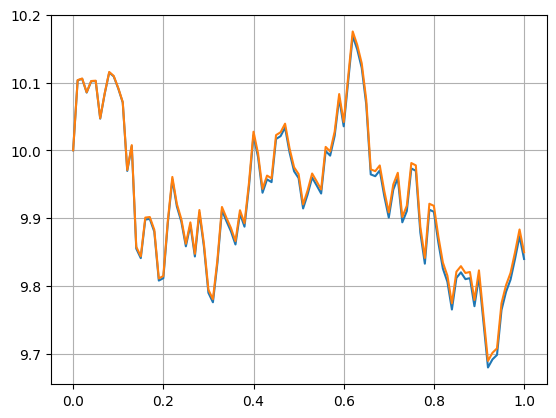

In [9]:
w = np.random.normal(0, np.sqrt(T / N), N)
# plt.plot(t, Ornstein_Uhlenbeck_EM(T, N, t, Delta, x0, w), label='Ornstein Uhlenbeck_EM')
# plt.plot(t, Ornstein_Uhlenbeck_sch(T, N, t, Delta, x0, w), label='Ornstein Uhlenbeck_sch')
# plt.plot(t, Ornstein_Uhlenbeck_sch2(T, N, t, Delta, x0, w), label='Ornstein Uhlenbeck_sch2')
# plt.plot(t, Ornstein_Uhlenbeck_pc(T, N, t, Delta, x0, w), label='Ornstein Uhlenbeck_pc')
# plt.plot(t, Ornstein_Uhlenbeck_KPS(T, N, t, Delta, x0, w), label='Ornstein Uhlenbeck_pc')
# plt.plot(t, Black_Scholes_Merton_EM(T, N, t, Delta, x0, w), label='Black_Scholes_Merton_EM')
# plt.plot(t, Black_Scholes_Merton_sch(T, N, t, Delta, x0, w), label='Black_Scholes_Merton_sch')
# plt.plot(t, Black_Scholes_Merton_pc(T, N, t, Delta, x0, w), label='Black_Scholes_Merton_pc')
# plt.plot(t, Black_Scholes_Merton_sch2(T, N, t, Delta, x0, w), label='Black_Scholes_Merton_sch2')
# plt.plot(t, Black_Scholes_Merton_KPS(T, N, t, Delta, x0, w), label='Black_Scholes_Merton_sch2')
# plt.plot(t, Cox_Ingersoll_Ross_EM(T, N, t, Delta, x0, w), label=' Cox_Ingersoll_Ross_EM')
plt.plot(t, Cox_Ingersoll_Ross_sch(T, N, t, Delta, x0, w), label=' Cox_Ingersoll_Ross_sch')
# plt.plot(t, Cox_Ingersoll_Ross_sch2(T, N, t, Delta, x0, w), label=' Cox_Ingersoll_Ross_sch2')
plt.plot(t, Cox_Ingersoll_Ross_pc(T, N, t, Delta, x0, w), label=' Cox_Ingersoll_Ross_pc')
# plt.plot(t, Cox_Ingersoll_Ross_KPS(T, N, t, Delta, x0, w), label=' Cox_Ingersoll_Ross_pc')
plt.grid()
# plt.legend()

In [10]:
def Black_Scholes_Merton(T, N, t, Delta, x0, w):
    theta1 = 1
    theta2 = 0.2
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        x[i] =  x[i-1] + theta1 * x[i-1] * T / N + theta2 * x[i-1] * w[i-1]
    return x

In [11]:
def Black_Scholes_Merton(T, N, t, Delta, x0, W):
    theta1 = 1
    theta2 = 0.2
    xt = []
#     W = BM(T, N, t, Delta)
    for i in range(0, N + 1):
        xt1 = x0 * np.exp((theta1 - theta2 ** 2 / 2) * t[i]  + theta2 * w[i])
        xt.append(xt1)
    return xt

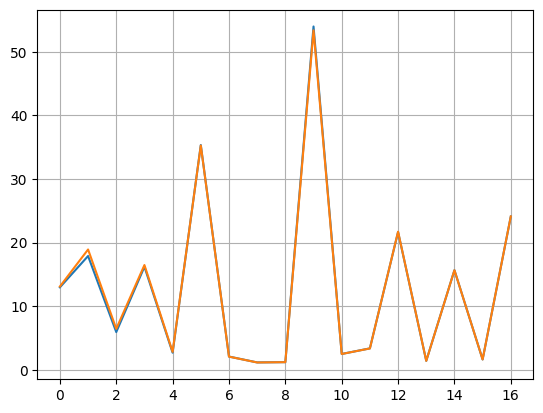

In [12]:
xt = []
xt1 = []
for j in range(1, 18):
    N = 2 ** j
    t = np.linspace(0, T, N + 1)
    x0 = 10
    w = np.random.normal(0, np.sqrt( T / N), N + 1)
    x1 = Black_Scholes_Merton(T, N, t, Delta, x0, w)
    x2 = Black_Scholes_Merton_EM(T, N, t, Delta, x0, w)
    x3 = Black_Scholes_Merton_sch(T, N, t, Delta, x0, w)
    xt.append(np.square(np.subtract(x1,x2)).mean())
    xt1.append(np.square(np.subtract(x1,x3)).mean())      
plt.plot(xt, label = 'Euler')
plt.plot(xt1, label = 'Milstein')
plt.grid()

In [86]:
def generate_random_number_OU(T, N, t, Delta, x0, w):
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N + 1)
    x[0] = x0
    for i in range(1, N + 1):
        x[i] = x[i-1] + (theta1 - theta2 * x[i-1]) * T / N + theta3 * w[i-1]
    
    w_OU = np.zeros(N + 1)
    for it, i in enumerate(t):
        E = theta1 / theta2 + (x[it-1] - theta1 / theta2) * np.exp(-theta2 * i)
        D = theta3 ** 2 * (1 - np.exp(-2 * theta2 * i)) / (2 * theta2)
        w_OU[it-1] = np.random.normal(E, D)
#     plt.plot(t, w_OU)
#     plt.plot(t, x)
    return w_OU, x, E, D 

def generate_random_number_CIR(T, N, t, Delta, x0, w):    
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N+1):
         x[i] = x[i-1] + (theta1 - theta2 * x[i-1]) * T / N + theta3 * np.sqrt(x[i-1]) * w[i-1]

    w_CIR = np.zeros(N + 1)
    for it, i in enumerate(t):
        E = theta1 / theta2 + (x[it-1] - theta1 / theta2) * np.exp(-theta2 * i)
        D = x[it-1] * theta3 ** 2 * ((np.exp(-theta2 * i) - np.exp(-2 * theta2 * i))/theta2) + (theta1 * theta3 ** 2 * (1 - np.exp(-2 * theta2 * i))) / 2 / theta2 ** 2
        w_CIR[it-1] = np.random.normal(E, D)
#     plt.plot(t, w_CIR)
#     plt.plot(t, x)
    return w_CIR, x, E, D 

def generate_random_number_BSM(T, N, t, Delta, x0, w):    
    theta1 = 0.01
    theta2 = 0.1
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        x[i] = x[i-1] + theta1 * x[i-1] * T / N + theta2 * x[i-1] * w[i-1]

    w_BSM = np.zeros(N + 1)
    for it, i in enumerate(t):
        E = x[it-1] * np.exp(theta1 * i)
        D = x[it-1] ** 2 * np.exp(2 * theta1 * i) * (np.exp((theta2 ** 2) * i) - 1)
        w_BSM[it-1] = np.random.normal(E, D)
#     plt.plot(t, w_BSM)
#     plt.plot(t, x)    
    return w_BSM, x, E, D 

def staionary_laws_OU(N):   
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    w = np.zeros(N + 1)
    for i in range(0, N + 1):
        w[i] = np.random.normal(theta1 / theta2, theta3 ** 2 / (2 * theta2))
    return w

def staionary_laws_CIR(N):   
    theta1 = 2
    theta2 = 0.2
    theta3 = 0.15
    w = np.zeros(N + 1)
    for i in range(0, N + 1):
        w[i] = np.random.gamma(2 * theta1 / theta3 ** 2, theta3 ** 2 / (2 * theta2))
    return w

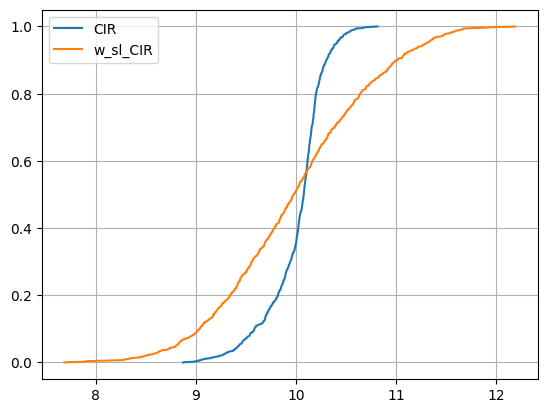

In [94]:
w_CIR, x, E_CIR, D_CIR  = generate_random_number_CIR(T, N, t, Delta, x0, w)
w_sl_OU = staionary_laws_OU(N)
w_sl_CIR = staionary_laws_CIR(N)
plt.plot(np.sort(w_CIR), t, label='CIR')
plt.plot(np.sort(w_sl_CIR), t, label='w_sl_CIR')
plt.legend()
plt.grid()

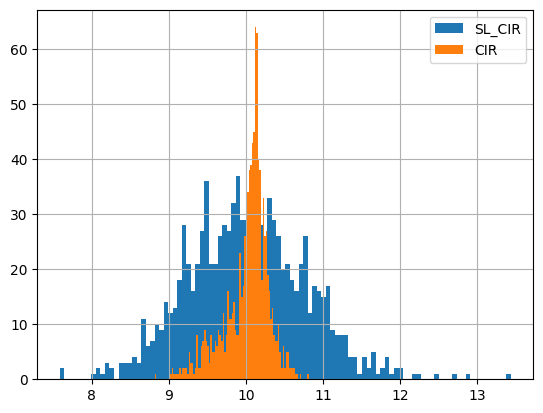

In [89]:

plt.hist(w_sl_CIR, bins=100, label='SL_CIR')
plt.hist(w_CIR, bins=100, label='CIR')
# plt.plot(w_CIR, stats.norm.pdf(w_CIR, E_CIR, D_CIR))
plt.legend()
plt.grid()

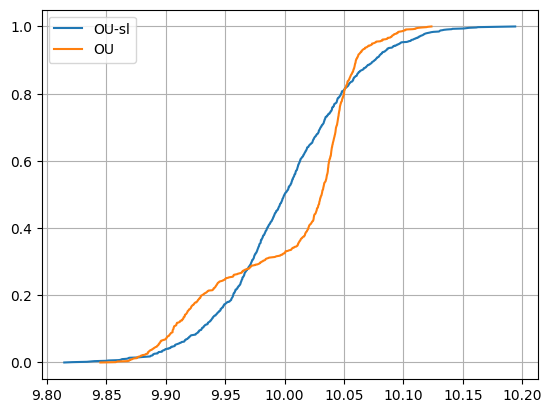

In [79]:
w_OU, x, E_OU, D_OU = generate_random_number_OU(T, N, t, Delta, x0, w)
w_sl = staionary_laws(N)
plt.plot(np.sort(w_sl), t, label='OU-sl')
plt.plot(np.sort(w_OU), t, label='OU')
plt.legend()
plt.grid()

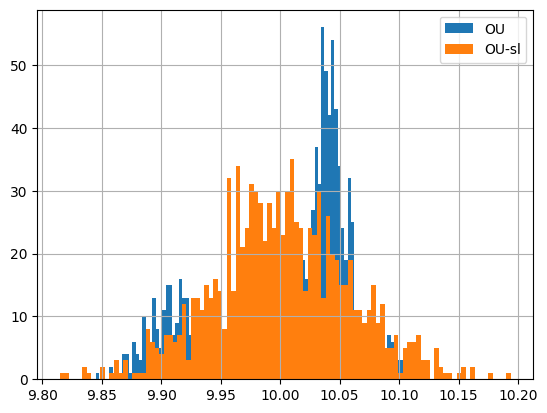

In [93]:
plt.hist(w_OU, bins=100, label='OU')
plt.hist(w_sl, bins=100, label='OU-sl')
# plt.hist(w_OU, bins=100, label='OU')
plt.legend()
plt.grid()

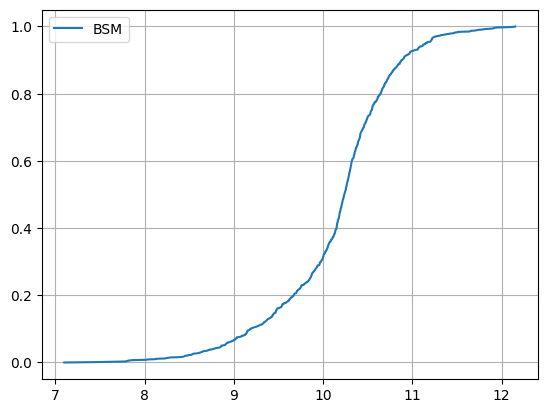

In [74]:
w_BSM, x, E_BSM, D_BSM = generate_random_number_BSM(T, N, t, Delta, x0, w)
plt.plot(np.sort(w_BSM), t, label='BSM')
plt.legend()
plt.grid()


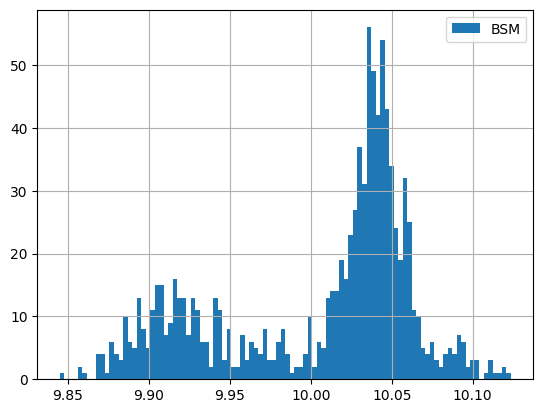

In [96]:
plt.hist(w_OU, bins=100, label='BSM')
plt.legend()
plt.grid()

In [87]:
print(nm.quantile(w_OU, 0.9))
print(nm.quantile(w_CIR, 0.9))
print(nm.quantile(w_BSM, 0.9))
print(nm.quantile(w_sl_OU, 0.9))
print(nm.quantile(w_sl_CIR, 0.9))

10.06015243223616
10.309660809120063
10.879625987747081
10.075509993950593
10.961019476434263


In [24]:
w_OU = pd.DataFrame(w_OU, index=[t])
w_CIR = pd.DataFrame(w_CIR, index=[t])
w_BSM = pd.DataFrame(w_BSM, index=[t])
w_OU.to_csv("Ornstein Uhlenbeck.csv", index=True)
w_CIR.to_csv("Black_Scholes_Merton.csv", index=True)
w_BSM.to_csv("Cox_Ingersoll_Ross.csv", index=True)